### Try new partial cooling sequence with cooling at Z direction first

In [113]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp
import cupyx
import matplotlib.pyplot as plt
from tqdm import tqdm
M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

In [3]:
seq_partial = np.load("seq_partial.npy")

In [70]:
np.unique(seq_partial, axis=0)

array([[ 0.00000000e+00, -3.00000000e+00,  2.45060364e+04,
         7.00000000e-05],
       [ 0.00000000e+00, -2.00000000e+00,  2.45060364e+04,
         7.00000000e-05],
       [ 0.00000000e+00, -1.00000000e+00,  1.36588502e+04,
         5.00000000e-05],
       [ 1.00000000e+00, -3.00000000e+00,  1.68208398e+04,
         7.00000000e-05],
       [ 1.00000000e+00, -2.00000000e+00,  1.68208398e+04,
         7.00000000e-05],
       [ 1.00000000e+00, -1.00000000e+00,  9.93243171e+03,
         5.00000000e-05],
       [ 2.00000000e+00, -5.00000000e+00,  4.58400345e+03,
         5.00000000e-05],
       [ 2.00000000e+00, -4.00000000e+00,  4.58400345e+03,
         5.00000000e-05],
       [ 2.00000000e+00, -3.00000000e+00,  2.36040951e+03,
         2.00000000e-04],
       [ 2.00000000e+00, -2.00000000e+00,  2.36040951e+03,
         2.00000000e-04]])

In [4]:
np.unique(np.load("gen_45.npy"), axis=0)

array([[ 0.00000000e+00, -3.00000000e+00,  1.76594483e+04,
         8.36717035e-05],
       [ 0.00000000e+00, -2.00000000e+00,  8.60968532e+03,
         1.17046293e-04],
       [ 0.00000000e+00, -1.00000000e+00,  1.36588502e+03,
         2.35755490e-05],
       [ 1.00000000e+00, -3.00000000e+00,  8.27053582e+03,
         1.40830368e-04],
       [ 1.00000000e+00, -2.00000000e+00,  1.22960834e+04,
         1.35644088e-04],
       [ 1.00000000e+00, -1.00000000e+00,  1.24925508e+03,
         2.03690554e-05],
       [ 2.00000000e+00, -5.00000000e+00,  6.87600517e+03,
         7.48209039e-05],
       [ 2.00000000e+00, -4.00000000e+00,  6.87428574e+03,
         9.17299107e-05],
       [ 2.00000000e+00, -3.00000000e+00,  3.54061427e+03,
         2.00092550e-04],
       [ 2.00000000e+00, -2.00000000e+00,  3.54061427e+03,
         1.33420193e-04]])

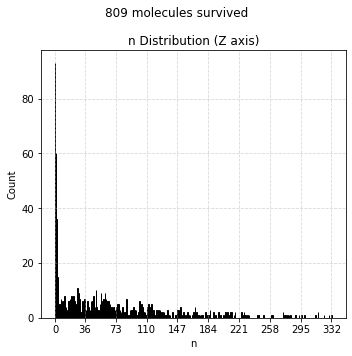

{'survival_rate_mean': array(0.809),
 'survival_rate_sem': array(0.00040204),
 'mot_mean': array([ 0.24103832,  0.41161928, 62.50556242]),
 'mot_sem': array([0.00154428, 0.00288331, 0.07556708]),
 'ground_state_rate_mean': array(0.09238579),
 'ground_state_rate_sem': array(0.00029933),
 'N': array(1000),
 'B': array(1000)}

In [5]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_partial, res)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

### Z-I

In [114]:
seq_new = np.empty((280, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(40):
    seq_new[i] = new_Z1[i%4]

Raman pulses: 100%|██████████| 40/40 [00:05<00:00,  7.20it/s]


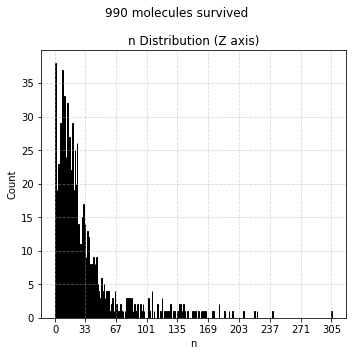

{'survival_rate_mean': array(0.99),
 'survival_rate_sem': array(0.00010337),
 'mot_mean': array([ 7.16969697,  8.22121212, 29.83838384]),
 'mot_sem': array([0.00756676, 0.00916005, 0.03603345]),
 'ground_state_rate_mean': array(0.001),
 'ground_state_rate_sem': array(3.2140769e-05),
 'N': array(1000),
 'B': array(1000)}

In [115]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new[:40], res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

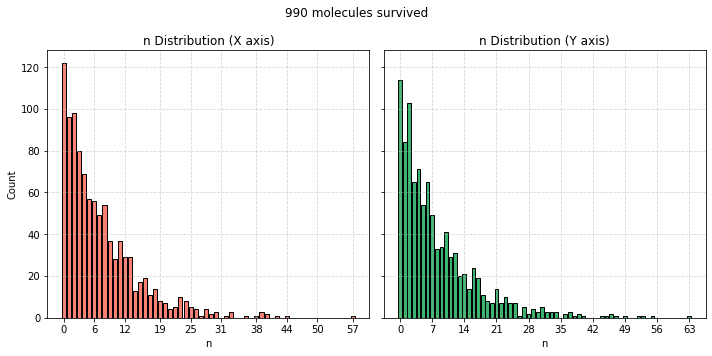

In [116]:
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

In [118]:
import json
payload = {
    "axes": ["x", "y", "z"],
    "counts": [{str(k): int(v) for k, v in d.items()} for d in dist],
}

with open("distributions/post_Z1.json", "w") as f:
    json.dump(payload, f, indent=2)

### XYZ-I

In [119]:
seq_new = np.empty((280, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(40):
    seq_new[i] = new_Z1[i%4]
new_XYZ1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [0, -3, 16e3, 8e-5],
                   [2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [1, -3, 16e3, 8e-5]])
for i in np.arange(40, 160, 1):
    seq_new[i] = new_XYZ1[i%10]

Raman pulses: 100%|██████████| 160/160 [00:21<00:00,  7.56it/s]


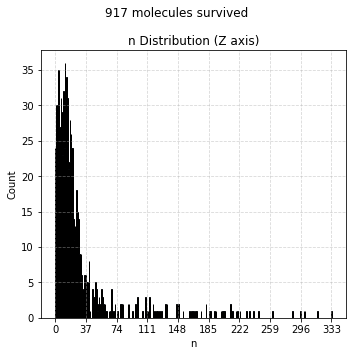

{'survival_rate_mean': array(0.917),
 'survival_rate_sem': array(0.00027446),
 'mot_mean': array([ 2.03053435,  2.73391494, 30.21810251]),
 'mot_sem': array([0.00398753, 0.00679691, 0.0511943 ]),
 'ground_state_rate_mean': array(0.0020141),
 'ground_state_rate_sem': array(4.62687207e-05),
 'N': array(1000),
 'B': array(1000)}

In [120]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new[:160], res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

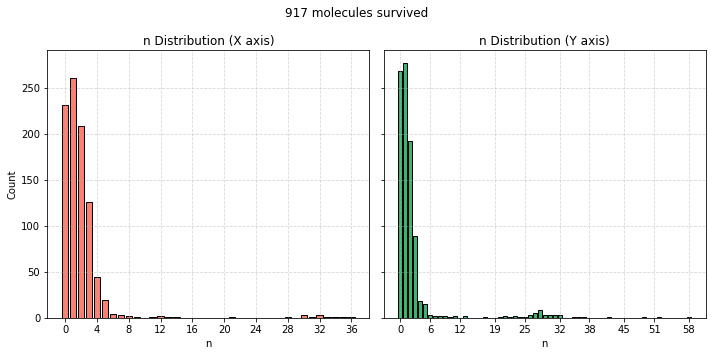

In [121]:
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

In [122]:
import json
payload = {
    "axes": ["x", "y", "z"],
    "counts": [{str(k): int(v) for k, v in d.items()} for d in dist],
}

with open("distributions/post_XYZ1.json", "w") as f:
    json.dump(payload, f, indent=2)

### XYZ-II

In [123]:
seq_new = np.empty((280, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(40):
    seq_new[i] = new_Z1[i%4]
new_XYZ1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [0, -3, 16e3, 8e-5],
                   [2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [1, -3, 16e3, 8e-5]])
for i in np.arange(40, 160, 1):
    seq_new[i] = new_XYZ1[i%10]
new_XYZ2 = np.array([[2, -8, 9e3, 3e-5],
                    [2, -7, 9e3, 3e-5],
                   [2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [0, -2, 13e3, 9e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [1, -2, 13e3, 9e-5]])
for i in np.arange(160, 240, 1):
    seq_new[i] = new_XYZ2[i%len(new_XYZ2)]

Raman pulses: 100%|██████████| 240/240 [00:32<00:00,  7.32it/s]


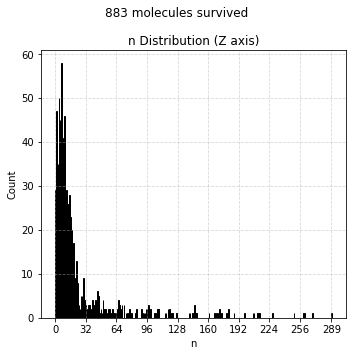

{'survival_rate_mean': array(0.883),
 'survival_rate_sem': array(0.00031358),
 'mot_mean': array([ 1.01132503,  1.62627407, 23.70215176]),
 'mot_sem': array([0.00412364, 0.00612137, 0.04340152]),
 'ground_state_rate_mean': array(0.00805639),
 'ground_state_rate_sem': array(8.76693533e-05),
 'N': array(1000),
 'B': array(1000)}

In [124]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new[:240], res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

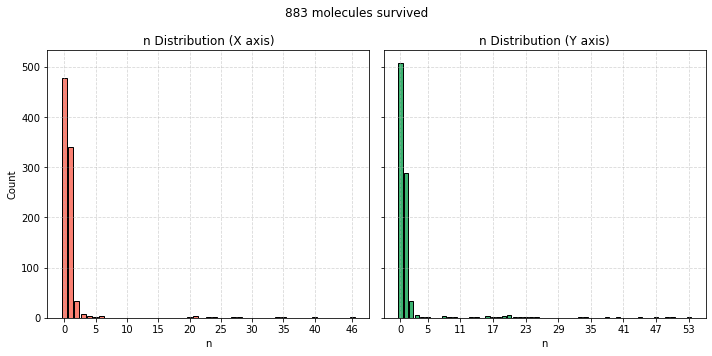

In [125]:
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

In [126]:
import json
payload = {
    "axes": ["x", "y", "z"],
    "counts": [{str(k): int(v) for k, v in d.items()} for d in dist],
}

with open("distributions/post_XYZ2.json", "w") as f:
    json.dump(payload, f, indent=2)

### XYZ-III

In [127]:
seq_new = np.empty((360, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(40):
    seq_new[i] = new_Z1[i%4]
new_XYZ1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [0, -3, 16e3, 8e-5],
                   [2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [1, -3, 16e3, 8e-5]])
for i in np.arange(40, 160, 1):
    seq_new[i] = new_XYZ1[i%10]
new_XYZ2 = np.array([[2, -8, 9e3, 3e-5],
                    [2, -7, 9e3, 3e-5],
                   [2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [0, -2, 13e3, 9e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [1, -2, 13e3, 9e-5]])
for i in np.arange(160, 240, 1):
    seq_new[i] = new_XYZ2[i%len(new_XYZ2)]
new_XYZ3 = np.array([[2, -6, 6e3, 5e-5],
                    [2, -5, 6e3, 5e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5],
                   [0, -1, 9e3, 12e-5],
                   [2, -6, 6e3, 5e-5],
                    [2, -5, 6e3, 5e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5],
                   [1, -1, 9e3, 12e-5]])
for i in np.arange(240, 360, 1):
    seq_new[i] = new_XYZ3[i%len(new_XYZ3)]

Raman pulses: 100%|██████████| 360/360 [00:47<00:00,  7.51it/s]


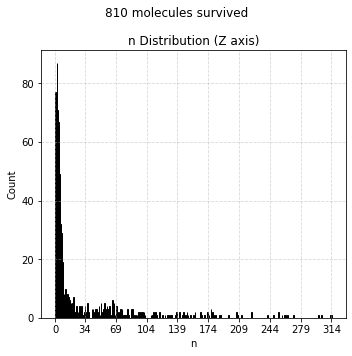

{'survival_rate_mean': array(0.81),
 'survival_rate_sem': array(0.00040553),
 'mot_mean': array([ 0.5       ,  0.93703704, 30.30987654]),
 'mot_sem': array([0.00383901, 0.00507505, 0.05739343]),
 'ground_state_rate_mean': array(0.07568113),
 'ground_state_rate_sem': array(0.00025754),
 'N': array(1000),
 'B': array(1000)}

In [128]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new, res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

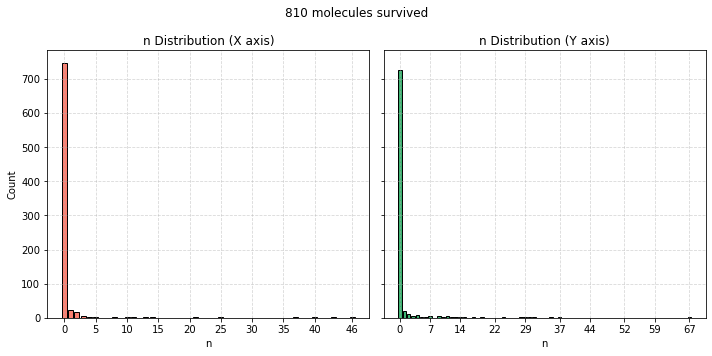

In [129]:
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

In [131]:
import json
payload = {
    "axes": ["x", "y", "z"],
    "counts": [{str(k): int(v) for k, v in d.items()} for d in dist],
}

with open("distributions/post_XYZ3.json", "w") as f:
    json.dump(payload, f, indent=2)

### XYZ4

In [132]:
seq_new = np.empty((480, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(40):
    seq_new[i] = new_Z1[i%4]
new_XYZ1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [0, -3, 16e3, 8e-5],
                   [2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [1, -3, 16e3, 8e-5]])
for i in np.arange(40, 160, 1):
    seq_new[i] = new_XYZ1[i%10]
new_XYZ2 = np.array([[2, -8, 9e3, 3e-5],
                    [2, -7, 9e3, 3e-5],
                   [2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [0, -2, 13e3, 9e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5],
                   [2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [1, -2, 13e3, 9e-5]])
for i in np.arange(160, 240, 1):
    seq_new[i] = new_XYZ2[i%len(new_XYZ2)]
new_XYZ3 = np.array([[2, -6, 6e3, 5e-5],
                    [2, -5, 6e3, 5e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5],
                   [0, -1, 9e3, 12e-5],
                   [2, -6, 6e3, 5e-5],
                    [2, -5, 6e3, 5e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5],
                   [1, -1, 9e3, 12e-5]])
for i in np.arange(240, 360, 1):
    seq_new[i] = new_XYZ3[i%len(new_XYZ3)]
new_XYZ4 = np.array([[2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5],
                   [2, -2, 3e3, 9e-5],
                   [2, -1, 3e3, 9e-5],
                   [0, -1, 9e3, 12e-5],
                   [2, -2, 3e3, 9e-5],
                   [2, -1, 3e3, 9e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5],
                   [1, -1, 9e3, 12e-5]])
for i in np.arange(360, 480, 1):
    seq_new[i] = new_XYZ4[i%len(new_XYZ4)]

Raman pulses: 100%|██████████| 480/480 [01:04<00:00,  7.40it/s]


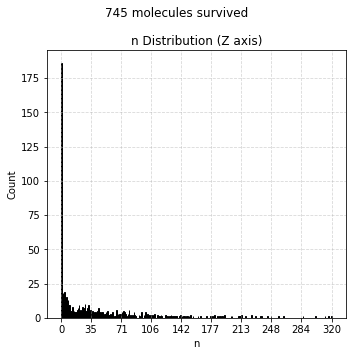

{'survival_rate_mean': array(0.745),
 'survival_rate_sem': array(0.00042292),
 'mot_mean': array([ 0.91275168,  1.46979866, 39.58791946]),
 'mot_sem': array([0.00435816, 0.00607561, 0.06569738]),
 'ground_state_rate_mean': array(0.17802645),
 'ground_state_rate_sem': array(0.00038532),
 'N': array(1000),
 'B': array(1000)}

In [133]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new, res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

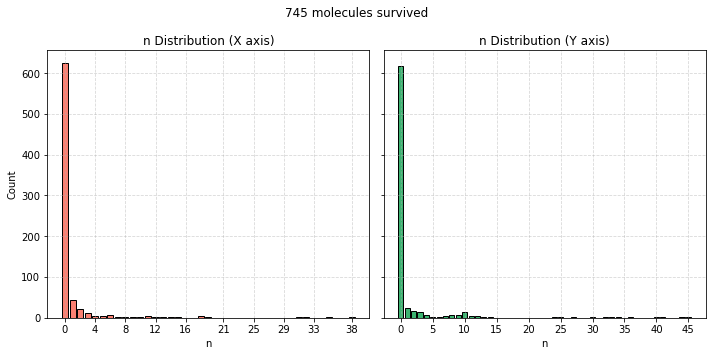

In [134]:
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

In [135]:
import json
payload = {
    "axes": ["x", "y", "z"],
    "counts": [{str(k): int(v) for k, v in d.items()} for d in dist],
}

with open("distributions/post_XYZ4.json", "w") as f:
    json.dump(payload, f, indent=2)

In [112]:
np.save("sequence_new.npy", seq_new)